# 0.) Import the Credit Card Fraud Data From CCLE

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B/fraudTest.csv")

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]
df_select = pd.get_dummies(df_select, columns=["category"])
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time"] = [i.hour for i in df_select["trans_date_trans_time"]]

In [ ]:
X = df_select.drop(["trans_date_trans_time", "is_fraud"], axis=1)
y = df["is_fraud"]

In [ ]:
X.head()

,amt,city_pop,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,time
0,2.86,333497,0,0,0,0,0,0,0,0,0,0,1,0,0,0,12
1,29.84,302,0,0,0,0,0,0,0,0,0,0,1,0,0,0,12
2,41.28,34496,0,0,0,0,0,1,0,0,0,0,0,0,0,0,12
3,60.05,54767,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12
4,3.19,1126,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Oversample
ros = RandomOverSampler()
x_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample
rus = RandomUnderSampler()
x_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE
smo = SMOTE()
x_train_smo, y_train_smo = smo.fit_resample(X_train,y_train)

# 3.) Train three logistic regression models 

In [ ]:
from sklearn.linear_model import LogisticRegression

over = LogisticRegression().fit(x_train_ros, y_train_ros)
under = LogisticRegression().fit(x_train_rus, y_train_rus)
smote = LogisticRegression().fit(x_train_smo, y_train_smo)

# 4.) Test the three models

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Oversampled
pred_ros = over.predict(X_test)

print(confusion_matrix(y_test, pred_ros))
print("Accuracy:", accuracy_score(y_test, pred_ros))

[[134555  31508]
 [   176    477]]
Accuracy: 0.8099522541327767


In [ ]:
# Undersampled
pred_rus = under.predict(X_test)

print(confusion_matrix(y_test, pred_rus))
print("Accuracy:", accuracy_score(y_test, pred_rus))

[[ 26895 139168]
 [    30    623]]
Accuracy: 0.16505914249382184


In [ ]:
# Smote
pred_smo = smote.predict(X_test)

print(confusion_matrix(y_test, pred_smo))
print("Accuracy:", accuracy_score(y_test, pred_smo))

[[136265  29798]
 [   180    473]]
Accuracy: 0.8201852251733487


# 5.) Which performed best in Out of Sample metrics?

The SMOTE sample performed the best because it has the highest accuracy compared to the others.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [ ]:
raw_temp = pd.concat([X_train,y_train],axis=1)

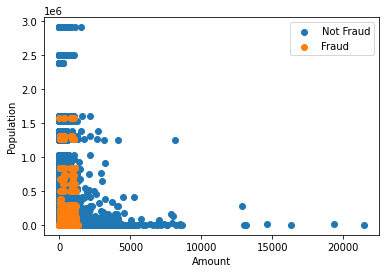

In [ ]:
plt.scatter(raw_temp[raw_temp["is_fraud"]==0]["amt"],raw_temp[raw_temp["is_fraud"]==0]["city_pop"])
plt.scatter(raw_temp[raw_temp["is_fraud"]==1]["amt"],raw_temp[raw_temp["is_fraud"]==1]["city_pop"])
plt.legend(["Not Fraud","Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.show()

In [ ]:
raw_temp_s=pd.concat([x_train_smo, y_train_smo],axis=1)

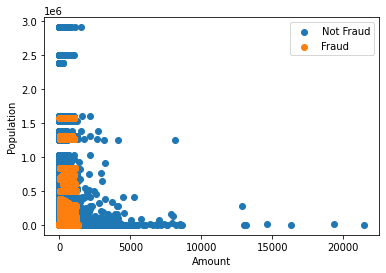

In [ ]:
plt.scatter(raw_temp_s[raw_temp_s["is_fraud"]==0]["amt"],raw_temp_s[raw_temp_s["is_fraud"]==0]["city_pop"])
plt.scatter(raw_temp_s[raw_temp_s["is_fraud"]==1]["amt"],raw_temp_s[raw_temp_s["is_fraud"]==1]["city_pop"])
plt.legend(["Not Fraud","Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.show()